In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import re
import string

In [4]:
data_fake = pd.read_csv('Fake.csv')  # Load fake news dataset
data_true = pd.read_csv('True.csv')  # Load true news dataset

In [5]:
data_fake.head() # Display first 5 rows of fake news data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
data_true.head() # Display first 5 rows of true news data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
data_fake["class"] = 0  # Label fake news as 0
data_true['class'] = 1  # Label true news as 1

In [8]:
data_fake.shape, data_true.shape # Check original shapes of fake and true news datasets

((23481, 5), (21417, 5))

In [9]:
data_fake_manual_testing = data_fake.tail(10) # Extract last 10 rows from fake news for manual testing 

# Remove last 10 rows from fake news dataset (indices 23470-23480)
for i in range(23480, 23470, -1): # Remove last 10 rows from fake news dataset (indices 23470-23480)
    data_fake.drop([i], axis = 0, inplace = True) # Permanently drop rows
    
# Repeating same process for true news dataset
data_true_manual_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
    data_true.drop([i], axis = 0, inplace = True)

In [10]:
data_fake.shape, data_true.shape # Verifying new shapes after removal

((23471, 5), (21407, 5))

In [11]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

C:\Users\Hp-21\AppData\Local\Temp\ipykernel_18772\277247672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
C:\Users\Hp-21\AppData\Local\Temp\ipykernel_18772\277247672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [12]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [13]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [14]:
data_merge = pd.concat([data_fake, data_true], axis = 0) # Combine fake and true news datasets vertically (axis=0)
data_merge.head(10) # Display first 10 rows of merged dataset to verify successful combination

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [15]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
# Create a simplified dataframe keeping only 'text' and 'class' columns
# Dropping 'title', 'subject', and 'date' as they won't be used for modeling

data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

In [17]:
data.isnull().sum() # Shows count of null values per column

text     0
class    0
dtype: int64

In [18]:
# Shuffling Dataset

data = data.sample(frac = 1) # frac=1 means return all rows in random order

In [19]:
data.head() # Displaying first 5 rows of shuffled dataset

,text,class
13644,LONDON (Reuters) - A British government offici...,1
9869,Tucker Carlson started out his show by showing...,0
23232,SARTRE 21st Century WireEvery day the world mo...,0
18675,May 7th is likely going to be a day of clashes...,0
4044,"It s Fox News, but that doesn t mean that ever...",0


In [20]:
data.reset_index(inplace = True) # Reset index after shuffling (creates new sequential index)
data.drop(['index'], axis = 1, inplace = True) # Remove the old index column that was created by reset_index()

In [21]:
data.columns  # show only 'text' and 'class'

Index(['text', 'class'], dtype='object')

In [22]:
data.head()

,text,class
0,LONDON (Reuters) - A British government offici...,1
1,Tucker Carlson started out his show by showing...,0
2,SARTRE 21st Century WireEvery day the world mo...,0
3,May 7th is likely going to be a day of clashes...,0
4,"It s Fox News, but that doesn t mean that ever...",0


In [23]:
def wordopt(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub('\[.*?\]', '', text)  # Remove square brackets
    text = re.sub("\\W", " ", text)  # Remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove newlines
    text = re.sub('\w*\d\w*', '', text)  # Remove numbers
    return text

In [24]:
data['text'] = data['text'].apply(wordopt) # Apply cleaning to all text

In [25]:
x = data['text']  # Features (news text)
y = data['class']  # Labels (0=fake, 1=true)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25) # 75% train, 25% test

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()  # Convert text to TF-IDF features
xv_train = vectorization.fit_transform(x_train)  # Fit on train data
xv_test = vectorization.transform(x_test)  # Transform test data

In [28]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()  # Initialize model
LR.fit(xv_train, y_train)  # Train model

LogisticRegression()

In [29]:
pred_lr = LR.predict(xv_test)  # Predict on test data

In [30]:
LR.score(xv_test, y_test)

0.9857397504456328

In [31]:
print(classification_report(y_test, pred_lr)) # Print precision/recall metrics

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5922
           1       0.98      0.99      0.98      5298

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [30]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()  # Initialize model
DT.fit(xv_train, y_train)  # Train model

DecisionTreeClassifier()

In [31]:
pred_dt = DT.predict(xv_test) # Predict on test data

In [32]:
DT.score(xv_test,y_test) 

0.9950089126559715

In [33]:
print(classification_report(y_test, pred_lr))  # Print metrics

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5911
           1       0.98      0.99      0.98      5309

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



In [34]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [35]:
pred_gb = GB.predict(xv_test) 

In [36]:
GB.score(xv_test, y_test)

0.9958110516934047

In [37]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5911
           1       0.99      1.00      1.00      5309

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [38]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [39]:
pred_rf = RF.predict(xv_test)

In [40]:
RF.score(xv_test, y_test)

0.985204991087344

In [41]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5911
           1       0.99      0.98      0.98      5309

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [42]:
def output_label(n):
    if n == 0:
        return "Fake news"
    elif n == 1:
        return "Not a Fake News"

def manual_testing(news):
    testing_news = {"text": [news]}  # Format input text
    new_def_test = pd.DataFrame(testing_news)  # Convert to DataFrame
    new_def_test["text"] = new_def_test["text"].apply(wordopt)  # Clean text
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test) # Transform to TF-IDF
    
    pred_LR = LR.predict(new_xv_test)  # Predict using Logistic Regression
    pred_DT = DT.predict(new_xv_test)  # Predict using Decision Tree
    pred_GB = GB.predict(new_xv_test)  # Predict using Gradient Boosting
    pred_RF = RF.predict(new_xv_test)  # Predict using Random Forest  
    
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(output_label(pred_LR[0]),
                                                                                                             output_label(pred_DT[0]),
                                                                                                             output_label(pred_GB[0]),
                                                                                                             output_label(pred_RF[0])))

In [47]:
data_fake['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [49]:
data_true['text'][0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [51]:
news = str(input())
manual_testing(news)

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educati

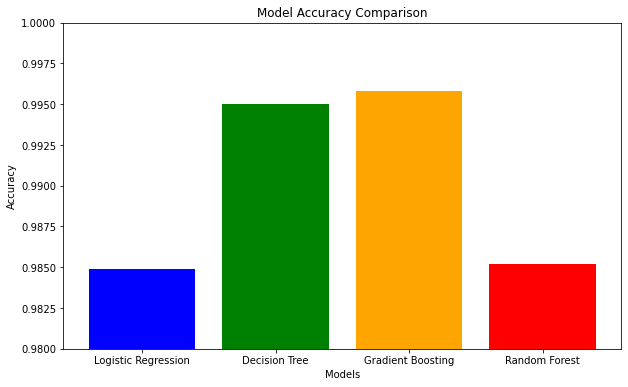

In [1]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest']
accuracy = [0.9849, 0.9950, 0.9958, 0.9852]

plt.figure(figsize=(10,6))
plt.bar(models, accuracy, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.98, 1.0)
plt.show()

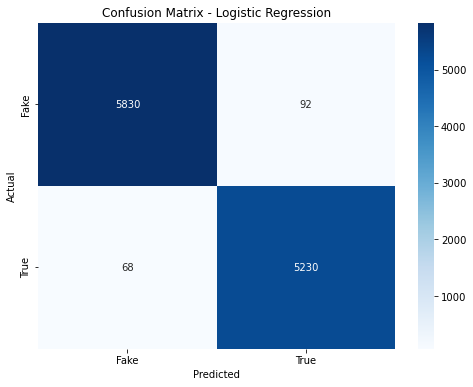

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fake', 'True'], 
            yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()